
# **Graduate Rotational Internship Program**

# **THE SPARKS FOUNDATION**

## **TASK 1 - Prediction using Supervised ML**
● Predict the percentage of an student based on the no. of study hours.  
● This is a simple linear regression task as it involves just 2 variables. 
● You can use R, Python, SAS Enterprise Miner or any other tool  
● Data can be found at http://bit.ly/w-data 
● What will be predicted score if a student studies for 9.25 hrs/ day?


### *Author - Siddhant Pradhan*
### *College: GEC, Patan*

In [8]:
# importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

### *To view the data we are using head()*



In [15]:
# Reading the Data 
siddhantdata = pd.read_csv('http://bit.ly/w-data')
print("The data is successfully Published")
siddhantdata.head(10)


The data is successfully Published


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [10]:
# Check if there any null value in the Dataset
siddhantdata.isnull == True

False

**There is no null value in the Dataset so, we can now visualize our Data.**

### Plotting Distribution on the basis of Marks vs Study Hour ()

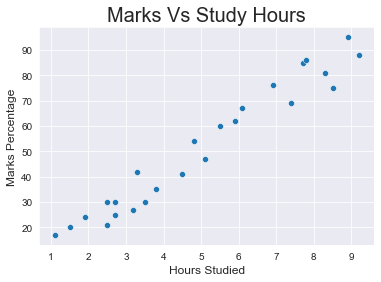

In [11]:
sns.set_style('darkgrid')
sns.scatterplot(y= data['Scores'], x= data['Hours'])
plt.title('Marks Vs Study Hours',size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

**From the above scatter plot there looks to be correlation between the 'Marks Percentage' and 'Hours Studied', Lets plot a regression line to confirm the correlation.**

c:\users\sidth\appdata\local\programs\python\python37\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([[<AxesSubplot:title={'center':'Hours'}>,
        <AxesSubplot:title={'center':'Scores'}>]], dtype=object)

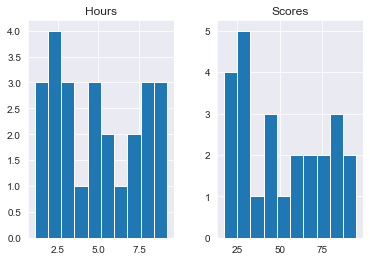

In [17]:
siddhantdata.hist()

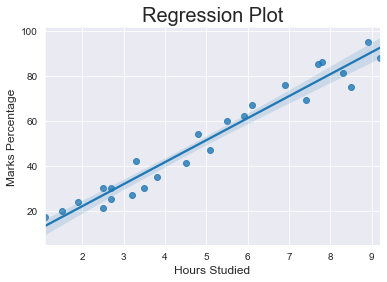

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [55]:
sns.regplot(x= data['Hours'], y= data['Scores'])
plt.title('Regression Plot',size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()
print(data.corr())

### Dividing Data into Attributes ()

In [18]:
X = siddhantdata.iloc[:, :-1].values    
y = siddhantdata.iloc[:, 1].values 
print(X,y)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]] [21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


**It is confirmed that the variables are positively correlated.**

## Training the Model
### 1) Splitting the Data

In [19]:
# Spliting the Data in two
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

### 2) Fitting the Data into the model

In [20]:
regression = LinearRegression()
regression.fit(train_X, train_y)
print("---------Model Trained---------")

---------Model Trained---------


### 3) Plotting a test Data

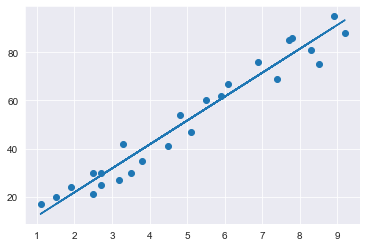

In [22]:
line = regression.coef_*X+regression.intercept_  
plt.scatter(X, y)  
plt.plot(X, line);  
plt.show() 

## Predicting the Percentage of Marks

In [23]:
pred_y = regression.predict(val_X)
prediction = pd.DataFrame({'Hours': [i[0] for i in val_X], 'Predicted Marks': [k for k in pred_y]})
prediction

,Hours,Predicted Marks
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


## Comparing the Predicted Marks with the Actual Marks

In [24]:
compare_scores = pd.DataFrame({'Actual Marks': val_y, 'Predicted Marks': pred_y})
compare_scores

,Actual Marks,Predicted Marks
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


## Visually Comparing the Predicted Marks with the Actual Marks

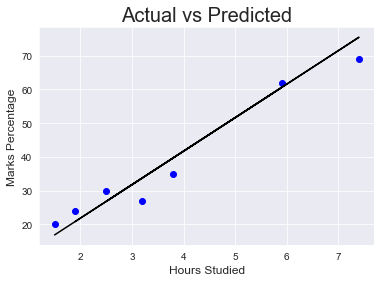

In [25]:
plt.scatter(x=val_X, y=val_y, color='blue')
plt.plot(val_X, pred_y, color='Black')
plt.title('Actual vs Predicted', size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

## Evaluating the Model

In [26]:
# Calculating the accuracy of the model
print('Mean absolute error: ',mean_absolute_error(val_y,pred_y))

Mean absolute error:  4.130879918502486


**Small value of Mean absolute error states that the chances of error or wrong forecasting through the model are very less.**

## What will be the predicted score of a student if he/she studies for 9.25 hrs/ day?

In [27]:
hours = [9.25]
answer = regression.predict([hours])
print("Score = {}".format(round(answer[0],3)))

Score = 93.893


**According to the regression model if a student studies for 9.25 hours a day he/she is likely to score 93.89 marks.**